# Exercise Set 10

Due: **9:30 20 June 2022**

Discussion: **13:00 24 June 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

# 1. Maximum Likelihood analysis [100 points]

## Flux density measurements

In this exercise we repeat an example from the lecture and  extend it: **Flux density measurements** (Lecture Note 11 p. 17).

Like in the lecture we suppose that we have flux density measurements at the frequencies,

  $$ f_i\ \in\ \big(0.4,\ 1.4,\ 2.7,\ 5,\ 10\big) \ \mathrm{GHz}, $$
  
with corresponding measured flux densities,

  $$ 1.855,\ 0.640,\ 0.444,\ 0.22,\ 0.102\ \mathrm{flux\ units}. $$

Let the frequencies be $f_i$ and the data $S_i$. The measurements follow a power-law slope of $-1$, on top of which a $10\%$ Gaussian noise level is added. The noise level is denoted $\epsilon$ and the model for the flux density as a function of frequency is $kf^{-\gamma}$. Assuming we know the noise level and distribution, each term in the likelihood product is of the form:

$$ 
\frac{1}{\sqrt{2\pi}\epsilon{}k{}f_i^{-\gamma}} \mathrm{exp} \Big( - \frac{(S_i-k{}f_i^{-\gamma})^2)}{2(\epsilon{}k{}f_i^{-\gamma})^2} 
\Big)
$$

We are therefore fitting Gaussians to the errors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
fi = np.array([0.4,1.4,2.7,5,10])

Si = np.array([1.855,0.640,0.444,0.22,0.102])

**a)** Plot the measured spectrum on a log-log scale. **10 points**

Text(0.5, 1.0, 'specturm on a log-log scale')

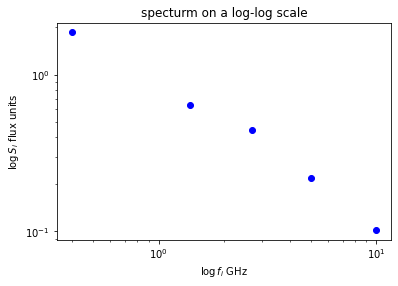

In [2]:
plt.loglog(fi,Si,'bo')
plt.xlabel(r'$\log{f_i}$ GHz')
plt.ylabel(r'$\log{S_i}$ flux units')
plt.title(r'specturm on a log-log scale')

**b)** Compute the logarithmic likelihood for a range of $k$ and $\gamma$ values in the range of the maximum likelihood. Normalize the likelihood. Produce a 2-D plot of the logarithmic likelihood for each calculated pair of $k$ and $\gamma$. **20 points**

$$ 
\frac{1}{\sqrt{2\pi}\epsilon{}k{}f_i^{-\gamma}} \mathrm{exp} \Big( - \frac{(S_i-k{}f_i^{-\gamma})^2)}{2(\epsilon{}k{}f_i^{-\gamma})^2} 
\Big)
$$

In [3]:
epsilon = 0.1

C:\Users\XIONGX~1\AppData\Local\Temp/ipykernel_14424/764769955.py:8: RuntimeWarning: divide by zero encountered in log
  logL+=np.log(P)


Text(0.5, 0, '$\\gamma$')

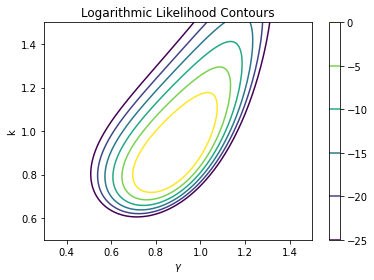

In [15]:
k0,gamma0 = np.linspace(0.5,1.5,100),np.linspace(0.3,1.5,100)
gamma,k = np.meshgrid(gamma0,k0)
logL = np.zeros(shape=(len(k0),len(gamma0))) #model A
p_gamma_k = np.ones(shape=(len(k0),len(gamma0)))
for i in range(len(fi)):  
    P= 1/(np.sqrt(2*pi)*epsilon*k*fi[i]**(-gamma))*np.exp(-(Si[i]-k*fi[i]**(-gamma))**2/(2*(epsilon*k*fi[i]**(-gamma))**2))
    p_gamma_k*=P
    logL+=np.log(P)

plt.contour(gamma,k,logL, levels = [-25,-20,-15,-10,-5,0])
plt.colorbar()
plt.title('Logarithmic Likelihood Contours')
plt.ylabel('k')
plt.xlabel(r'$\gamma$')

**c)** Now look at the probability of one parameter independent of the other parameter. This is called marginalization. In other words we have the posterior probability $\mathcal{P}_r(k,\gamma|S_i)$ and can form:

$$\mathcal{P}_r(k|S_i) = \int{\mathcal{P}_r(k,\gamma|S_i) d\gamma}$$

Compute the marginal probability distributions for $k$ and $\gamma$ and plot them individually. **20 points**

Text(0, 0.5, '$P_r(\\gamma|S_i)$')

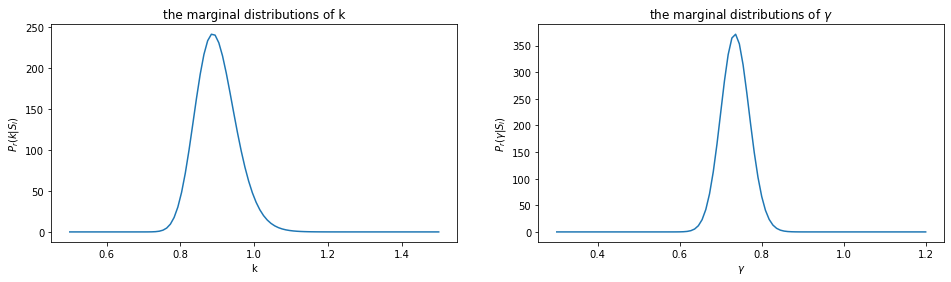

In [8]:
fig,ax = plt.subplots(1,2,figsize=(16, 4))
p_k = np.trapz(p_gamma_k, gamma0)
p_gamma = np.trapz(p_gamma_k.T, k0)

ax[0].plot(k0,p_k)
ax[0].set_title('the marginal distributions of k')
ax[0].set_xlabel('k')
ax[0].set_ylabel(r'$P_r(k|S_i)$')
ax[1].plot(gamma0,p_gamma)
ax[1].set_title(r'the marginal distributions of $\gamma$')
ax[1].set_xlabel('$\gamma$')
ax[1].set_ylabel(r'$P_r(\gamma|S_i)$')

**d)** Add an *artificial* 0.4 flux units to the flux measurements, then use it to calculate two models: 

 - Model A is the same as above with no offsets. 

 - Model B uses a model for the flux densities of the form of $\beta+kf^{-\gamma}$. Thus each likelihood term is:

$$
\frac{1}{\sqrt{2\pi}\epsilon{}k{}f_i^{-\gamma}} \mathrm{exp} \Big( - \frac{(S_i-(\beta + k{}f_i^{-\gamma}))^2}{2(\epsilon{}k{}f_i^{-\gamma})^2} 
\Big)
$$

Plot the contours of the computed logarithmic likelihoods for each Model into the same plot. Compare both models with each other. Which one gives better results? Explain why. **30 points**

C:\Users\XIONGX~1\AppData\Local\Temp/ipykernel_14424/2252549093.py:13: RuntimeWarning: divide by zero encountered in log
  logL_A+=np.log(P_A)
C:\Users\XIONGX~1\AppData\Local\Temp/ipykernel_14424/2252549093.py:16: RuntimeWarning: divide by zero encountered in log
  logL_B = np.log(p_gamma_k_B)


Text(0.8, 0.54, 'Model B: $\\int P_r(\\beta,k,\\gamma|S_i)d\\beta$')

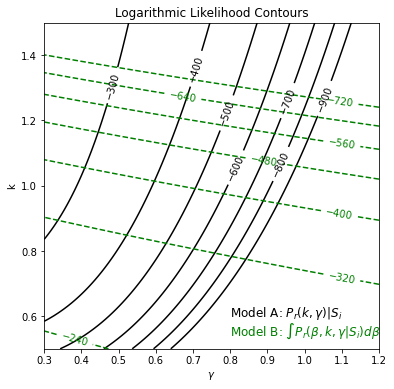

In [6]:
bins = 100
k0,gamma0,beta0 = np.linspace(0.5,1.5,bins),np.linspace(0.3,1.2,bins),np.linspace(0.36,0.44,bins)

gamma_A,k_A =np.meshgrid(gamma0,k0)
beta,gamma,k, = np.meshgrid(beta0,gamma0,k0)

logL_A = np.zeros(shape=(bins,bins)) #model A
p_beta_gamma_k = np.ones(shape=(bins,bins,bins))
for i in range(len(fi)):  
    P_A = 1/(np.sqrt(2*pi)*epsilon*k_A*fi[i]**(-gamma_A))*np.exp(-(Si[i]-0.4-k_A*fi[i]**(-gamma_A))**2/(2*(epsilon*k_A*fi[i]**(-gamma_A))**2))
    P_B = 1/(np.sqrt(2*pi)*epsilon*k*fi[i]**(-gamma))*np.exp(-(Si[i]-beta-k*fi[i]**(-gamma))**2/(2*(epsilon*k*fi[i]**(-gamma))**2))
    p_beta_gamma_k*=P_B
    logL_A+=np.log(P_A)
    
p_gamma_k_B = np.trapz(p_beta_gamma_k,beta0)
logL_B = np.log(p_gamma_k_B)

fig, ax = plt.subplots(figsize=(6, 6))
modelA = ax.contour(gamma_A,k_A,logL_A,linestyles = 'solid',colors = ['black'])#label = r'Model A: $P_r(K,\gamma)|S_i$'
ax.clabel(modelA,inline = 1,fontsize = 10)
modelB = ax.contour(gamma_A,k_A,logL_B,linestyles = 'dashed',colors = ['green'] )#label = r'Model B: $\int P_r(\beta,k,\gamma|S_i)d\beta$'
ax.clabel(modelB,inline = 1,fontsize = 10)
ax.set_title('Logarithmic Likelihood Contours')
ax.set_ylabel('k')
ax.set_xlabel(r'$\gamma$')
ax.text(x=0.8, y=0.6,s=r'Model A: $P_r(k,\gamma)|S_i$',fontsize=12)
ax.text(x=0.8, y=0.54,s=r'Model B: $\int P_r(\beta,k,\gamma|S_i)d\beta$',fontsize=12,color='green')

**e)** Compute the marginal probability distributions for Model B for the three parameters: $\beta$, $\gamma$, and $k$ and plot them. **20 points**

Text(0, 0.5, '$P_r(\\beta|S_i)$')

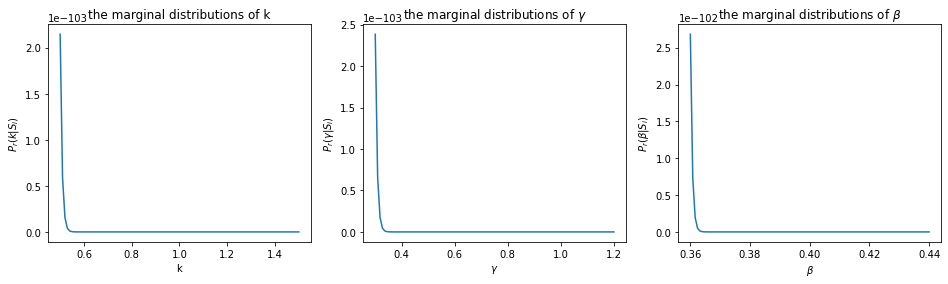

In [7]:
fig,ax = plt.subplots(1,3,figsize=(16, 4))
p_k = np.trapz(np.trapz(p_beta_gamma_k, beta0),gamma0)
p_gamma = np.trapz(np.trapz(p_beta_gamma_k, beta0),k0)
p_beta = np.trapz(np.trapz(p_beta_gamma_k,gamma0),k0)

ax[0].plot(k0,p_k)
ax[0].set_title('the marginal distributions of k')
ax[0].set_xlabel('k')
ax[0].set_ylabel(r'$P_r(k|S_i)$')
ax[1].plot(gamma0,p_gamma)
ax[1].set_title(r'the marginal distributions of $\gamma$')
ax[1].set_xlabel('$\gamma$')
ax[1].set_ylabel(r'$P_r(\gamma|S_i)$')
ax[2].plot(beta0,p_beta)
ax[2].set_title(r'the marginal distributions of $\beta$')
ax[2].set_xlabel(r'$\beta$')
ax[2].set_ylabel(r'$P_r(\beta|S_i)$')